### Machine Learning En construccion

###### Redes Neuronales

Tensorflow

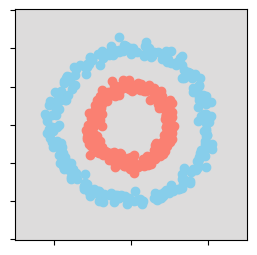

In [11]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_circles

X,Y = make_circles(n_samples=500, factor=0.5, noise=0.05)
res=100
_X0= np.linspace(-1.5, 1.5, res)
_X1= np.linspace(-1.5, 1.5, res)

_pX = np.array(np.meshgrid(_X0,_X1)).T.reshape(-1,2)
_pY = np.zeros((res,res))+0.5

plt.figure(figsize=(3,3))
plt.pcolormesh(_X0, _X1, _pY, cmap="coolwarm", vmin=0, vmax=1)

plt.scatter(X[Y==0,0],X[Y==0,1], c="skyblue")
plt.scatter(X[Y==1,0],X[Y==1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

In [17]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/25/49/2255373efd193c6fbd97dc22399e9c830a6517a0f02ca77fbc0bd83ac5cc/pip-24.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB 3.9 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.8 MB 7.5 MB/s eta 0:00:01
   ------------------------------- -------- 1.4/1.8 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --upgrade tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.7/377.0 MB 21.1 MB/s eta 0:00:18
   ---------------------------------------- 1.0/377.0 MB 21.4 MB/s eta 0:00:18
   ---------------------------------------- 1.7/377.0 MB 13.5 MB/s eta 0:00:28
   ---------------------------------------- 2.7/377.0 MB 15.7 MB/s eta 0:00:24
   ---------------------------------------- 3.5/377.0 MB 16.0 MB/s eta 0:00:24
    --------------------------------------- 4.8/377.0 MB 17.8 MB/s eta 0:00:21
    --------------------------------------- 6.0/377.0 MB 19.0 MB/s eta 0:00:20
    --------------------------------------- 7.2/377.0 MB 20.0 MB/s eta 0:00:19
    --------------------------------------- 8.3/377.0 MB 20.5 MB/s eta 0:00:18
    --------------------------------------- 9.3/377.0 MB 20.5 MB/s eta 0:

In [20]:
 pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [31]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML



iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr=0.01
nn=[2,16,8,1]


w1 = tf.Variable(tf.random_normal([nn[0],nn[1]]), name='weight_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX,w1), b1))

w2 = tf.Variable(tf.random_normal([nn[1],nn[2]]), name='weight_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1,w2), b2)) 

w3 = tf.Variable(tf.random_normal([nn[2],nn[3]]), name='weight_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

pY = tf.nn.sigmoid(tf.add(tf.matmul(l2,w3), b3))[:,0]

loss = tf.losses.mean_squared_error(pY, iY)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps = 1000
iPY = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(n_steps):
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX : X, iY : Y})
    if step % 25 == 0:
        acc = np.mean(np.round(_pY) == Y)
        print ('step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
        _pY = sess.run(pY, feed_dict={iX:_pX}).reshape((res,res))
        iPY.append(_PY)

    
ims = []
fig = plt.figure(figsize=(10, 10))
print('---Generando animacion ---')

for fr in range(len(ipy)):
    im=plt.pcolormesh(_x0,_x1, iPY[fr], cmap='coolwarm', animated=True)
    
plt.scatter(x[Y == 0,0],x[Y == 0,1], c='skyblue')
plt.scatter(x[Y == 1,0],x[Y == 1,1], c='salmon')

plt.tick_params(labelbottom=False, labelleft=False)
ims.append([im])
ani=animation.ArtisAnimation(fig,ims, interval=50, blit= True, repeat_delay=1000)
HTLM(ani.to_html5_video())

IndentationError: expected an indented block after 'for' statement on line 37 (273218395.py, line 38)

Keras

In [44]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML

lr= 0.01
nn=[2,16,8,1]

model = kr.Sequential()

l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

model.compile(loss='mse', optimizer = kr.optimizers.SGD(lr=0.05), metrics=['acc'])
model.fit(X,Y, epochs=100)


C:\Users\ricar\AppData\Local\Temp\ipykernel_14128\2810620506.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


ValueError: Argument(s) not recognized: {'lr': 0.05}

Sklearn

In [43]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML

lr = 0.01
nn = [2,16,8,1]

clf = sk.neural_network.MLPRegressor(solver='sgd',
                                    learning_rate_init=lr,
                                    hidden_layer_sizes=tuple(nn[1:]),
                                    verbose=True,
                                    n_iter_no_change=1000,
                                    batch_size=64)

clf.fit(X,Y)

C:\Users\ricar\AppData\Local\Temp\ipykernel_14128\1779874944.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Iteration 1, loss = 0.12875490
Iteration 2, loss = 0.12316152
Iteration 3, loss = 0.12207285
Iteration 4, loss = 0.12183357
Iteration 5, loss = 0.12133142
Iteration 6, loss = 0.12108586
Iteration 7, loss = 0.12070414
Iteration 8, loss = 0.12036787
Iteration 9, loss = 0.11997931
Iteration 10, loss = 0.11978003
Iteration 11, loss = 0.11914691
Iteration 12, loss = 0.11868382
Iteration 13, loss = 0.11822032
Iteration 14, loss = 0.11769203
Iteration 15, loss = 0.11712541
Iteration 16, loss = 0.11649408
Iteration 17, loss = 0.11582408
Iteration 18, loss = 0.11497649
Iteration 19, loss = 0.11432934
Iteration 20, loss = 0.11328824
Iteration 21, loss = 0.11221882
Iteration 22, loss = 0.11113871
Iteration 23, loss = 0.10997750
Iteration 24, loss = 0.10841445
Iteration 25, loss = 0.10687026
Iteration 26, loss = 0.10518178
Iteration 27, loss = 0.10324462
Iteration 28, loss = 0.10111906
Iteration 29, loss = 0.09918070
Iteration 30, loss = 0.09636792
Iteration 31, loss = 0.09373104
Iteration 32, los

C:\Users\ricar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)